In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import os
import joblib
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager

font_name = font_manager.FontProperties().get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
#plt.title('테스트입니다')

In [2]:
font_path = '/usr/share/fonts/truetype/NanumGothic.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [3]:
car_df = pd.read_csv('usedcar_total_0604.csv')
youtube_df = pd.read_csv('youtube_total_0604.csv')

In [5]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259237 entries, 0 to 259236
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   car_brand  259237 non-null  object
 1   car_model  259237 non-null  object
 2   comments   259237 non-null  object
 3   likes      259237 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 7.9+ MB


In [6]:
youtube_df.head(5)

,car_brand,car_model,comments,likes
0,BMW,1시리즈,"주제선정 좋아요. 더운 여름 잘 지내세요. 비싼차, 싼차, 슈퍼카, 경차 가리지 않...",3
1,BMW,1시리즈,주차장 시승평 잘봤네요ㅋ 그냥 외관이랑 실내평만 보면 편안할듯ㅋㅋ 매력적인 차네요 ...,3
2,BMW,1시리즈,차 가격도 싸고 디자인도 예쁘고 엄청 좋다,5
3,BMW,1시리즈,좀 끄럽다 하셨는데 g30 5시리즈랑 어느정도 차이가 날까요? ㅎㅎ,2
4,BMW,1시리즈,그나마 전륜으로 바뀌면서 공간이 좀 쓸만해 졌죠. 이전세대 1시리즈는 정말.... ...,2


## 유튜브 관련도 분류모델 진행

1. label_columns 생성
2. 라벨링 진행 ( 비관련: 0 , 관련 : 1 )

In [7]:
y_df = youtube_df.copy()

In [8]:
y_df.insert(4,'related',0)

In [9]:
y_df.head(10)

,car_brand,car_model,comments,likes,related
0,BMW,1시리즈,"주제선정 좋아요. 더운 여름 잘 지내세요. 비싼차, 싼차, 슈퍼카, 경차 가리지 않...",3,0
1,BMW,1시리즈,주차장 시승평 잘봤네요ㅋ 그냥 외관이랑 실내평만 보면 편안할듯ㅋㅋ 매력적인 차네요 ...,3,0
2,BMW,1시리즈,차 가격도 싸고 디자인도 예쁘고 엄청 좋다,5,0
3,BMW,1시리즈,좀 끄럽다 하셨는데 g30 5시리즈랑 어느정도 차이가 날까요? ㅎㅎ,2,0
4,BMW,1시리즈,그나마 전륜으로 바뀌면서 공간이 좀 쓸만해 졌죠. 이전세대 1시리즈는 정말.... ...,2,0
5,BMW,1시리즈,우리나라에서 MC12 시승기를 보는 날이 언제쯤 올까요? 슈퍼카 전문 유튜버 우파님...,1,0
6,BMW,1시리즈,궁금했던 차량 리뷰해주셔서 감사합니다~ 작은차를 좋아해서 그런지 충분히 매력적이네요,4,0
7,BMW,1시리즈,이뿐데 출력이 아쉽네요. 윗급 20d에 들어가는 190마력짜리를 디튠한거라면 칩튠이...,1,0
8,BMW,1시리즈,1시리즈도 뭔가 매력적인데ㅜㅜ 가격적인 부분도 매력적이고ㅜㅜ!!,5,0
9,BMW,1시리즈,우파님 영상보면 차를 엄청 사고 싶네요..,3,0


---
---
## Label : 비관련 = 0,  관련 = 1
----
----


In [10]:
y_df[y_df['comments'].str.contains(':')]

,car_brand,car_model,comments,likes,related
15,BMW,1시리즈,와 많이 이뻐졌네요 저도 2016년식 하나 들고 있는데 애착 많이 가는 차에요:),3,0
63,BMW,1시리즈,7:35 손바닥 자국 ㅋㅋㅋㅋㅋ,32,0
102,BMW,1시리즈,5:02 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,19,0
142,BMW,1시리즈,2:04 는 BMW액티브투어러 입니다,34,0
179,BMW,1시리즈,1:54 감스트 지나감,11,0
...,...,...,...,...,...
259034,혼다,파일럿,파일럿 내구성 좋은차이긴 하지만..솔직히 좀 심심한 차인듯해요.폭스바겐 아틀라스 곧...,5,0
259063,혼다,파일럿,★노보스 한정판 보잉 선글라스!★\rhttps://smartstore.naver.c...,12,0
259116,혼다,파일럿,"4:32, 09:11, 20:50 에서 역시 혼다👏👏👏👏👏👏👏",10,0
259121,혼다,파일럿,11:58 캐딜락 에스컬레이드 지리네,2,0


In [11]:
y_df.sort_values(by=['likes'],ascending=False)

,car_brand,car_model,comments,likes,related
236862,현대,엘란트라,어제 임진각에서 뵌 K3 오너입니다.주차하고 내렸는데 우연히 만나게되어 너무 신기했...,984,0
228788,현대,아반떼,어제 임진각에서 뵌 K3 오너입니다.주차하고 내렸는데 우연히 만나게되어 너무 신기했...,984,0
88790,르노코리아,트위지,...타본후기.... 작고 귀엽고 단거리 출퇴근으로 좋다.. 단점.. 수도권은...,866,0
238947,현대,제네시스,부사장으로 승진하신 분이 나오셨네요. 본인의 성공이 본인만의 공이 아님을 아는 겸손...,857,0
189610,한국GM,다마스,사실상 지붕있고 네 발 달린 오토바이 수준이라 충돌 안전성은 기대하면 안 됨,835,0
...,...,...,...,...,...
151012,재규어,I-PACE,역시 재규어...,1,0
151009,재규어,I-PACE,아직은 전기차 인프라 및 행정상의 모든 상황들이 너무 미미한 것 같네요. 불편해서 ...,1,0
151008,재규어,I-PACE,현대자동차를 옹호하는것은 아니지만요즘 사람들의 자동차 정비 부실도 약간은 한몫한다고...,1,0
151006,재규어,I-PACE,빨리 결과가 나와서 현대차놈들 무릎꿀는 모습을 보고싶네요,1,0


In [12]:
y_df['comments'][236862]

'어제 임진각에서 뵌 K3 오너입니다.주차하고 내렸는데 우연히 만나게되어 너무 신기했네요~아반떼 정말 이쁘고 잘 나온듯 싶습니다.'

## 중복된 영상에서 가져온 경우가 있어서 확인 필요

In [13]:
y_df.drop_duplicates(['comments'], keep ='first', inplace= True)
y_df.reset_index(drop=True,inplace=True)

In [14]:
y_df.sort_values(by=['likes'],ascending=False)

,car_brand,car_model,comments,likes,related
184856,현대,아반떼,어제 임진각에서 뵌 K3 오너입니다.주차하고 내렸는데 우연히 만나게되어 너무 신기했...,984,0
71437,르노코리아,트위지,...타본후기.... 작고 귀엽고 단거리 출퇴근으로 좋다.. 단점.. 수도권은...,866,0
192101,현대,제네시스,부사장으로 승진하신 분이 나오셨네요. 본인의 성공이 본인만의 공이 아님을 아는 겸손...,857,0
150572,한국GM,다마스,사실상 지붕있고 네 발 달린 오토바이 수준이라 충돌 안전성은 기대하면 안 됨,835,0
40149,기아,옵티마,2004년식 sm525v 43만km. 6년전 아버지 뇌출혈로 조수석에 모시고 응급실...,830,0
...,...,...,...,...,...
132386,포르쉐,911,재미있게 잘봤습니다~~!!,1,0
57445,랜드로버,디스커버리 스포츠,15년 디스커버리 스포츠 타는데. 써비스센타 오일교환비용 40만원 장난아니네. 넘 ...,1,0
132384,포르쉐,911,와... 진짜 911은 볼때마다 대박이다 근데 기어봉이 뭔가 이상해...,1,0
132383,포르쉐,911,항상 신형이 갑이네!,1,0


### 1. 관련용어(차량관련, 브랜드,모델,연료,형태 등등)를 지정하여 1차 필터링( Label =1)

In [15]:
# 단어있는지 탐색해보는 창
# 타임스탬프 댓글은 ':' 으로 탐색
y_df[y_df['comments'].str.contains('흉기')]

,car_brand,car_model,comments,likes,related
307,BMW,1시리즈,"나도 BMW 후륜구동때문에 타고 있는데, 후륜구동을 버렸다고? 누가 결정한건지 모르...",1,0
3663,BMW,5시리즈,역시 벤츠 걱정은 흉기가 할게 아니였다ㅋㅋ,7,0
6266,BMW,iX,5:52 흉기랑 비교를 하면안되죠 ㅋㅋ,1,0
6743,BMW,iX,BMW는 타면서도 계속 느끼는거지만 차 기본기는 물론이고 탑승자의 편의성에 대한 배...,6,0
6841,BMW,iX,역시 흉기는 못따라오겠네요. ㅎㅎ,1,0
...,...,...,...,...,...
206866,혼다,어코드,그래도 엔진망가지고 오일 먹는 흉기보단 좋아 하체랑 구성 은 얘기...,9,0
206873,혼다,어코드,그래도 흉기보단 믿음가네,3,0
207456,혼다,오딧세이,흉기차는 껍데기만 멀쩡 엔진은 결함과 고장으로 불안. 기술의 혼다차는 그 반대임....,15,0
207558,혼다,오딧세이,결론... 비유하자면 토목은 오딧세이.. 건축은 카니발.. ...,1,0


## upper랑 lower함수로 review내 영어를 대문자나 소문자 둘 중 하나로 통일시키자

In [43]:
for i in range(len(y_df)):
    y_df['comments'][i] = y_df['comments'][i].upper()

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## word_list만들어서 탐색해서 1차 필터링

In [44]:
related_words = ['핸들', '액셀', '디자인', '기어', '크락션', '경적', '앞유리', '본네트', '방향지시등', '사이드브레이크', '사이드 브레이크',
               '트렁크', '썬루프', '썬팅', '백미러', '룸미러', '코너링', '주차', '싼차', '차량', '슈퍼카', '후미등', '전조등', '내연기관',
               '코너링', '승차', '하차', '속도', '제로백', '서스펜더', '후진', '휠', '바퀴', '그랜져', '현기', '흉기', '비엠', '국산차',
                '외제차', '후륜', '전륜', '4륜', '세단', '옆태', ' 차', '자율', '앞모습', '앞 모습', '뒷모습', '뒷 모습', '옆모습', '옆 모습',
                 '이쁨', '이쁘네', '이쁘다', '콧구멍', '외관', '단점', '중고', '내수', '마력', 'sm', 'bm' ,'g', 'm', 'cc', 'i', '고급유',
                 '출력', '2인승', '해치백', 'M', '벨엔', 'cla', 'Cla','CLA', '싸게', '비싸게', '비싼', '싼', 'A클', 'S클', 'C클', '옵션', 'E클'
                 '가격', '드림카', '시트', '가격', 'A', 'S', '휘발유', '뒷자리', '뒷자석', '창문', '카푸어', '국산', '수입', '주행', '년식', 
                '연식', '년형', '연형']

unrelated_words = ['한준', '우파', '구독', '진택', '오프닝', '썸네일', '썸넬', '수지', '감독', '편집']

In [45]:
col_list = ['car_brand','car_model','fuel','car_type']

for col in col_list:
    for text in car_df[col].unique():
        related_words.append(text)
print(related_words)

['핸들', '액셀', '디자인', '기어', '크락션', '경적', '앞유리', '본네트', '방향지시등', '사이드브레이크', '사이드 브레이크', '트렁크', '썬루프', '썬팅', '백미러', '룸미러', '코너링', '주차', '싼차', '차량', '슈퍼카', '후미등', '전조등', '내연기관', '코너링', '승차', '하차', '속도', '제로백', '서스펜더', '후진', '휠', '바퀴', '그랜져', '현기', '흉기', '비엠', '국산차', '외제차', '후륜', '전륜', '4륜', '세단', '옆태', ' 차', '자율', '앞모습', '앞 모습', '뒷모습', '뒷 모습', '옆모습', '옆 모습', '이쁨', '이쁘네', '이쁘다', '콧구멍', '외관', '단점', '중고', '내수', '마력', 'sm', 'bm', 'g', 'm', 'cc', 'i', '고급유', '출력', '2인승', '해치백', 'M', '벨엔', 'cla', 'Cla', 'CLA', '싸게', '비싸게', '비싼', '싼', 'A클', 'S클', 'C클', '옵션', 'E클가격', '드림카', '시트', '가격', 'A', 'S', '휘발유', '뒷자리', '뒷자석', '창문', '카푸어', '국산', '수입', '주행', '년식', '연식', '년형', '연형', '한국GM', '르노삼성', '르노코리아', '쌍용', '폭스바겐', '닛산', '지프', '미니', '푸조', '도요타', '마세라티', '혼다', '캐딜락', '렉서스', '랜드로버', '포르쉐', '포드', '재규어', '인피니티', '볼보', '링컨', '크라이슬러', '쉐보레', '시트로엥', '벤틀리', '피아트', '애스턴마틴', '닷지', '페라리', '테슬라', '제네시스', 'BMW', '다이하쓰', '로버', '사브', '벤츠', 'MAN', '아우디', '허머', '스즈키', '롤스로이스', '맥라렌', '어큐라', '스바루', '동풍자동차', '스마트', '미쯔비시',

In [73]:
related_words.index('Cla')

74

In [74]:
related_words[74].upper()

'CLA'

In [75]:
for i in range(len(related_words)):
    related_words[i] = related_words[i].upper()

In [46]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207889 entries, 0 to 207888
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   car_brand  207889 non-null  object
 1   car_model  207889 non-null  object
 2   comments   207889 non-null  object
 3   likes      207889 non-null  int64 
 4   related    207889 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


In [47]:
for word in tqdm(related_words):
    word.split(' ')[0].split('(')[0]
    try:
        related_idx = y_df[y_df['comments'].str.contains(word)].index
        for idx in related_idx:
            y_df['related'][idx] = 1
    except:
        print(word)


  0%|          | 0/710 [00:00<?, ?it/s]/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
 40%|████      | 285/710 [00:35<00:39, 10.71it/s]/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
 92%|█████████▏| 653/710 [01:09<00:04, 12.80it/s]

e-에어로타운 (04년~


100%|██████████| 710/710 [01:15<00:00,  9.36it/s]


In [48]:
y_df[y_df['related'] == 1]

,car_brand,car_model,comments,likes,related
0,BMW,1시리즈,"주제선정 좋아요. 더운 여름 잘 지내세요. 비싼차, 싼차, 슈퍼카, 경차 가리지 않...",3,1
1,BMW,1시리즈,주차장 시승평 잘봤네요ㅋ 그냥 외관이랑 실내평만 보면 편안할듯ㅋㅋ 매력적인 차네요 ...,3,1
2,BMW,1시리즈,차 가격도 싸고 디자인도 예쁘고 엄청 좋다,5,1
3,BMW,1시리즈,좀 끄럽다 하셨는데 G30 5시리즈랑 어느정도 차이가 날까요? ㅎㅎ,2,1
4,BMW,1시리즈,그나마 전륜으로 바뀌면서 공간이 좀 쓸만해 졌죠. 이전세대 1시리즈는 정말.... ...,2,1
...,...,...,...,...,...
207884,혼다,파일럿,"파일럿 오너입니다. 패밀리카로는 정말 최고 입니다. 넓은공간, 조용하고 묵직한 주행...",3,1
207885,혼다,파일럿,제가 아는 현대차 카마스터님과 말투가 너무 비슷하시네요~ 파일럿 최고죠^^ 할인해줬...,2,1
207886,혼다,파일럿,혼다 변속기 버튼은 헷갈리지않습니다. 직관적입니다. 현대 전자식 변속기가 배워야할 ...,4,1
207887,혼다,파일럿,이전에 F10 520D 타신서 기억합니다. 그 이후에 F10 520D를 구매해서 타...,2,1


In [49]:
y_df[y_df['related'] == 0]

,car_brand,car_model,comments,likes,related
11,BMW,1시리즈,우파님 영상보고 자동차 유튜브 찍고 있는데 항상 힘이 되어주는 좋은 영상들 감사합니...,22,0
12,BMW,1시리즈,사고싶다,4,0
21,BMW,1시리즈,2명타기엔 진짜 엄청 좋은거 같네요,47,0
22,BMW,1시리즈,형님 존경합니다..ㅎㄷㄷㄷ,4,0
29,BMW,1시리즈,좋아요~꾹우~하영상 잘 볼게요~,4,0
...,...,...,...,...,...
207858,혼다,파일럿,일본차 정말잘만들긴합니다 잔고장도없고,20,0
207870,혼다,파일럿,"차는 좋은데 -,.-",6,0
207872,혼다,파일럿,8인승이라 가운데 통로가 없네요 그래서 패스.,1,0
207878,혼다,파일럿,"아, , , ,일본차는 좀...아닌듯",3,0


## unrelated_words 에 있는 것들이 포함되면 다시 0으로 라벨링

In [54]:
unrelated_words = ['한준', '우파', '구독', '진택', '오프닝', '썸네일', '썸넬', '수지', '감독', '편집']

for word in tqdm(unrelated_words):
    word.split(' ')[0].split('(')[0]
    try:
        unrelated_idx = y_df[y_df['comments'].str.contains(word)].index
        for idx in unrelated_idx:
            y_df['related'][idx] = 0
    except:
        print(word)


  0%|          | 0/10 [00:00<?, ?it/s]/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 10/10 [00:01<00:00,  8.03it/s]


<AxesSubplot:>

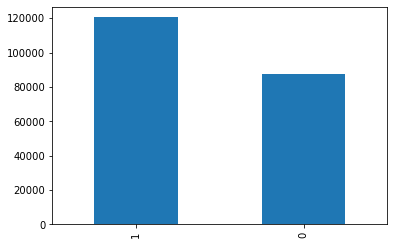

In [55]:
y_df['related'].value_counts().plot(kind = 'bar')


### 4. 저장 후 직접 데이터 확인해서 필터링 하기 ( 0과 1비율을 5:5로 맞추어서 준비하기)

In [56]:
y_df.to_csv('labeled_youtube_0605.csv', index = False)

> 데이터 나쁘지 않은 수준이지만 확실히 재처리는 필요해보임

## 리뷰데이터 확인해보기

In [66]:
y_df.sort_values(by=['comments'],ascending=False).head(20)

,car_brand,car_model,comments,likes,related
57542,랜드로버,디스커버리 스포츠,🥰🥰🥰👍👍👍👍👍👍,1,0
51055,닛산,타이탄,🥰😍🙌,2,0
189700,현대,아이오닉5,🤩파🤩다🤩사🤩워🤩리🤩 쳐보세요 유튜브에 하는법도 간단하고 집에서 할 수 있고 코로나...,1,0
166239,한국GM,트럭(4.5톤이상),"🤩물론 차는탐나는차인데~우리나라도로상황이나주차공간생각할때ᆢ스트레스받고,짜증날 두통차...",1,1
191956,현대,엘란트라,🤣,1,0
182161,현대,쏘나타,🤢껍데기는 빤지르하게 진화하는데 속은 말썽많은 '세타2'달았겠네 😵💩~,1,0
136997,포르쉐,타이칸,🤞🤗👌 PORCHE...DASHINGLY PERFECT.,2,1
46241,기타,굴삭기,🤗,1,0
92448,벤츠,트럭,🤔🤔👍👍👍,3,0
96188,볼보,XC60,🤔 아... 요즘 티맵 경로 추천 쓰레기 같은데....,2,0


In [61]:
y_df[y_df['comments'] == None]

,car_brand,car_model,comments,likes,related


In [67]:
y_df['comments'][190514]

'🚗 SK에너지주유소 스태프 8,350원 / 주당 법정 근로시간 52시간을 기준으로 산출한 금액입니다. (참고: 근로기준법, 19.10.2 알바천국 기준)🚕 자동차를 취득할때 발생하는 보험료, 취득세 등은 제외한 금액입니다.🚙 중고 자동차의 가격은 ‘엔카’를 참조하였습니다.🚌 비판은 감사하게 받아들이겠습니다. 하지만 이유없는 악플과 욕설 등은 예고없이 차단합니다. 이해부탁합니다.🚓 개인적인 견해의 자동차에 관한 이야기를 다룬 채널입니다. 의견은 여러분들과 다를 수 있으며 저의 안내가 100% 정확한 정보를 제공하지 못합니다.🚑 자동차를 판매하거나 브로커 역할은 하지 않습니다.'

## 전처리
### re정규식
1. 영어(대문자) 남김
2. 한글 남김
3. .,?! 남기기

## 관련도 분류 모델 돌려보기

In [105]:
import pandas as pd
from konlpy.tag import Hannanum
from hanspell import spell_checker
import re

In [110]:
df = pd.read_csv('emotion_labeled_youtube_0607.csv', lineterminator='\n')

In [114]:
df

,Unnamed: 0,index,car_brand,car_model,comments,likes,related,emotion
0,0,0,BMW,1시리즈,"주제선정 좋아요. 더운 여름 잘 지내세요. 비싼차, 싼차, 슈퍼카, 경차 가리지 않...",3,1,0
1,1,1,BMW,1시리즈,주차장 시승평 잘봤네요ㅋ 그냥 외관이랑 실내평만 보면 편안할듯ㅋㅋ 매력적인 차네요 ...,3,1,0
2,2,2,BMW,1시리즈,차 가격도 싸고 디자인도 예쁘고 엄청 좋다,5,1,0
3,3,3,BMW,1시리즈,좀 끄럽다 하셨는데 G30 5시리즈랑 어느정도 차이가 날까요? ㅎㅎ,2,1,0
4,4,4,BMW,1시리즈,그나마 전륜으로 바뀌면서 공간이 좀 쓸만해 졌죠. 이전세대 1시리즈는 정말.... ...,2,1,1
...,...,...,...,...,...,...,...,...
120483,120483,207884,혼다,파일럿,"파일럿 오너입니다. 패밀리카로는 정말 최고 입니다. 넓은공간, 조용하고 묵직한 주행...",3,1,0
120484,120484,207885,혼다,파일럿,제가 아는 현대차 카마스터님과 말투가 너무 비슷하시네요~ 파일럿 최고죠^^ 할인해줬...,2,1,1
120485,120485,207886,혼다,파일럿,혼다 변속기 버튼은 헷갈리지않습니다. 직관적입니다. 현대 전자식 변속기가 배워야할 ...,4,1,0
120486,120486,207887,혼다,파일럿,이전에 F10 520D 타신서 기억합니다. 그 이후에 F10 520D를 구매해서 타...,2,1,0


In [116]:
df = df[['car_brand','car_model','comments','likes','related','emotion']]

In [117]:
df

,car_brand,car_model,comments,likes,related,emotion
0,BMW,1시리즈,"주제선정 좋아요. 더운 여름 잘 지내세요. 비싼차, 싼차, 슈퍼카, 경차 가리지 않...",3,1,0
1,BMW,1시리즈,주차장 시승평 잘봤네요ㅋ 그냥 외관이랑 실내평만 보면 편안할듯ㅋㅋ 매력적인 차네요 ...,3,1,0
2,BMW,1시리즈,차 가격도 싸고 디자인도 예쁘고 엄청 좋다,5,1,0
3,BMW,1시리즈,좀 끄럽다 하셨는데 G30 5시리즈랑 어느정도 차이가 날까요? ㅎㅎ,2,1,0
4,BMW,1시리즈,그나마 전륜으로 바뀌면서 공간이 좀 쓸만해 졌죠. 이전세대 1시리즈는 정말.... ...,2,1,1
...,...,...,...,...,...,...
120483,혼다,파일럿,"파일럿 오너입니다. 패밀리카로는 정말 최고 입니다. 넓은공간, 조용하고 묵직한 주행...",3,1,0
120484,혼다,파일럿,제가 아는 현대차 카마스터님과 말투가 너무 비슷하시네요~ 파일럿 최고죠^^ 할인해줬...,2,1,1
120485,혼다,파일럿,혼다 변속기 버튼은 헷갈리지않습니다. 직관적입니다. 현대 전자식 변속기가 배워야할 ...,4,1,0
120486,혼다,파일럿,이전에 F10 520D 타신서 기억합니다. 그 이후에 F10 520D를 구매해서 타...,2,1,0


# 0 : 긍정  1: 부정  -1: 중립

<AxesSubplot:>

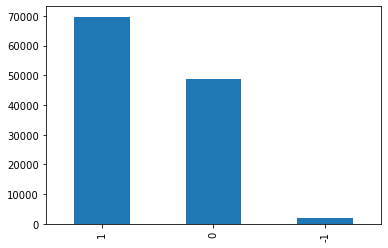

In [118]:
df['emotion'].value_counts().plot(kind = 'bar')

In [143]:
def preprocessing(text):# str, 맞춥법(hanspell)
    
    text = re.sub(' +', ' ',text) # 다중공백 >> 공백 한개
    text = re.sub('[^A-Za-z0-9ㄱ-ㅎㅏ-ㅣ가-힣.,!?]','',text) # .,?!와 한글 영어만 남김
    text = spell_checker.check(text) # 맞춤법 검사기 pip install py-hanspell
    text = text.checked # 맞춤법검사 후 결과만 뽑아내기
    
    
    return text # str

In [146]:
df['comments'][57542]

'와.. 진심 가지고싶다...쌍용 힘내라'

In [153]:
df.sort_values(by=['comments'],ascending=False).head(20)

,car_brand,car_model,comments,likes,related,emotion
96170,한국GM,트럭(4.5톤이상),"🤩물론 차는탐나는차인데~우리나라도로상황이나주차공간생각할때ᆢ스트레스받고,짜증날 두통차...",1,1,1
78173,포르쉐,타이칸,🤞🤗👌 PORCHE...DASHINGLY PERFECT.,2,1,0
120322,혼다,크로스투어,🚣‍♂️혼다 ㅋ 크로스 SUV 라 어떤차일까 난 CRV가 좋터라 ㅎ,2,1,0
110628,현대,에쿠스,"🚗 SK에너지주유소 스태프 8,350원 / 주당 법정 근로시간 52시간을 기준으로 ...",45,1,1
58251,쌍용,로디우스,😘판매완료😘언니네중고차 상담문의 010 - 8615 - 2966 😘,2,1,1
58173,쌍용,로디우스,😘판매완료😘언니네중고차 010-8691-2966😘,2,1,1
78166,포르쉐,타이칸,😍😍😍YOU ARE AWESOME🙌,3,1,0
113931,현대,캐스퍼,😍전주현대버스 전주현대트럭 최고 군산대우타타 트럭 최고 광주현대캐스퍼 최고 광...,1,1,0
113013,현대,캐스퍼,"🔴 ÇAN ÇİN, YA SÜPER KAR HUYANDAY.",1,1,0
31396,도요타,수프라,"🔥🔥🔥엔토리모델 2,000CC인기 많아요^ ^고맙습니다 좋은시청했어요",1,1,0


In [46]:
sample_sentence = df['comments'][31396] +'!?'+"【】』㈜©囹圄秋 ■◆◇▷▶↑↓↔〓♤♠♡♥♧♣⊙◈▣◐◑☆★\'"
sample_sentence

"엔트리 모델 2,000CC 인기 많아요 고맙습니다 좋은 시청했어요!?【】』㈜©囹圄秋 ■◆◇▷▶↑↓↔〓♤♠♡♥♧♣⊙◈▣◐◑☆★'"

In [47]:
sample = preprocessing(sample_sentence)
print(sample)

NameError: name 'preprocessing' is not defined

In [166]:
preprocessing(df['comments'][0])

'주제 선정 좋아요. 더운 여름 잘 지내세요. 비싼 차, 싼 차, 슈퍼카, 경차 가리지 않는 리뷰 좋습니다. 과연 명불허전 자동차에 대한 다양한 정보를 이렇게 재미있게 알려주는 채널이 또 있을까요? 앞으로도 꾸준히 많은 영상 올려주세요. 비가 많이 옵니다. 감사할 듯.'

In [167]:
error_list = []
for i,comments in enumerate(tqdm(df['comments'])):
    try:
        df['comments'][i] = preprocessing(df['comments'][i])
    except:
        print(i)
        error_list.append(i)
        pass

  0%|          | 0/120488 [00:00<?, ?it/s]/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
 14%|█▍        | 17106/120488 [51:21<29:11:57,  1.02s/it]

17103


 15%|█▌        | 18181/120488 [55:55<41:11:25,  1.45s/it]

18180


 23%|██▎       | 27567/120488 [1:25:29<29:34:35,  1.15s/it]

27566


 27%|██▋       | 32078/120488 [1:40:35<28:18:44,  1.15s/it]

32076


 29%|██▊       | 34360/120488 [1:48:55<24:13:51,  1.01s/it]

34358


 30%|██▉       | 36065/120488 [1:54:20<23:38:51,  1.01s/it]

36063


 31%|███       | 36839/120488 [1:57:21<17:59:37,  1.29it/s]

36836


 36%|███▌      | 42792/120488 [2:16:24<29:15:18,  1.36s/it]

42791


 39%|███▉      | 46921/120488 [2:29:44<18:31:52,  1.10it/s]

46919


 43%|████▎     | 51437/120488 [2:43:04<7:02:55,  2.72it/s] 

51436


 46%|████▌     | 55224/120488 [2:54:42<2:09:35,  8.39it/s] 

55224


 47%|████▋     | 56645/120488 [2:59:07<14:49:17,  1.20it/s]

56643


 50%|████▉     | 60045/120488 [3:09:07<11:20:56,  1.48it/s]

60042


 52%|█████▏    | 62369/120488 [3:16:44<14:12:35,  1.14it/s]

62367


 58%|█████▊    | 69416/120488 [3:36:24<9:28:28,  1.50it/s] 

69413


 68%|██████▊   | 81554/120488 [4:11:26<47:06, 13.78it/s]   

81550


 78%|███████▊  | 94471/120488 [4:54:22<13:09:10,  1.82s/it]

94470


 80%|███████▉  | 95813/120488 [4:59:08<6:16:08,  1.09it/s] 

95811


 81%|████████  | 97309/120488 [5:04:22<11:28:54,  1.78s/it]

97308


 83%|████████▎ | 100596/120488 [5:14:53<4:28:15,  1.24it/s]

100593


 89%|████████▉ | 107527/120488 [5:38:19<2:57:00,  1.22it/s]

107524


 99%|█████████▉| 119623/120488 [6:17:37<13:51,  1.04it/s]  

119620


100%|██████████| 120488/120488 [6:20:41<00:00,  5.28it/s]


In [171]:
for error in error_list:
    print(df['comments'][error])
    print('==경계선=='*5,'\n')

중국미세먼지나 우한폐렴이 ㅈ같은거인데 왜국가에서 자꾸 기업들만귀찮게하는지 이해를못하겟네 이러니까 30년도까지나 내연기관만든다구하는데 50년까진굴러다닐꺼같은데내가 먹구사는데는지장없는데 전기차량이나 수소차량 그런거 장려할려면 한전을 더욱장려해야되는데 조져놓고 남의나라에다가 팔려구하고 전기세는 어떻게감당할껀데나라를 진짜 통째로 말아먹고싶어서 난리난새기들 학교다닐대 화염병던지면서 데모만햇던새기들이 진짜 머리가없는거는맞는데 자신들이 한평생 잘살수잇는것두아니고 신앙같은거같아서 너무열받는다 후손들이나 대한민국제발잘먹구잘살게끔못하구 망칠려구 노력하는새기들 제발내려가...
==경계선====경계선====경계선====경계선====경계선== 

안녕하세요. 저는 풀옵션 셀토스를 5개월 8000KM 정도 타고있는 차주 입니다. 비교시승을 위해 3일전에 트레일 블레이저도 시승해보았는데요. 30살인 제 입장에서는 셀토스가 더 좋았습니다.이유는 가속능력과 오토홀드때문입니다. 셀토스를 시승해보신분들은 아시겠지만 가속능력. 즉 치고나가는 주행성능과 브레이크 성능이 이상하리만큼 좋습니다..제 입장에서는 여기에 나온 제로백 8초보다도 빠른 느낌이어서 유튜브를 찾아보니 셀토스 제로백 7초도 있더라구요. 셀토스로 밟아보시면 가속능력을 느끼실수 있을거에요. 쉐보레는 젊은 저에게 너무 답답한 가속감이었습니다.그리고 오토홀드는 써보신분들은 알겠지만 시내주행에서 오토홀드 없이 운전하기가 너무 불편하더라구요..직접 시승을 해보시고 구매하시면 좋을 것 같습니다. 사람마다 중요하게 여기는 부분이 다르니 각자에 맞는 차를 구매하시면 좋을 것 같아요
==경계선====경계선====경계선====경계선====경계선== 

닛산 엑스트레일 구입하고 두주정도 운행한사람입니다.첫날부터 엑셀을 밟으면 덜거턱 거리는소음으로 두주동안 두번이나 서비스센터에 보내졌고 소음을 녹음을해서 들려줘도 못믿더니 직접태우고 확인시켜주고나니 이제와서 원래소리가 덜거덕 거린답니다.저는 큰맘먹고 새차뽑아덜거덕거리는소리를 들으며 운행을해야할처지입니다.

In [172]:
df.to_csv('preprocessed_emotion_labeled_youtube_0607.csv',index=False, encoding ='utf-8-sig')

In [174]:
error_list

[17103,
 18180,
 27566,
 32076,
 34358,
 36063,
 36836,
 42791,
 46919,
 51436,
 55224,
 56643,
 60042,
 62367,
 69413,
 81550,
 94470,
 95811,
 97308,
 100593,
 107524,
 119620]

In [24]:
sample = pd.read_csv('preprocessed_emotion_labeled_youtube_0607.csv')
sample

,car_brand,car_model,comments,likes,related,emotion
0,BMW,1시리즈,"주제 선정 좋아요. 더운 여름 잘 지내세요. 비싼 차, 싼 차, 슈퍼카, 경차 가리...",3,1,0
1,BMW,1시리즈,주차장시승평잘봤네요ㅋ그냥외관이랑실내평만보면편안할듯ㅋㅋ매력적인차네요세컨으로,3,1,0
2,BMW,1시리즈,차 가격도 싸고 디자인도 예쁘고 엄청 좋다,5,1,0
3,BMW,1시리즈,좀끄럽다하셨는데G305시리즈랑어느정도차이가날까요?ㅎㅎ,2,1,0
4,BMW,1시리즈,그나마 전륜으로 바뀌면서 공간이 좀 쓸 만해졌죠. 이 전 세대 1시리즈는 정말......,2,1,1
...,...,...,...,...,...,...
120483,혼다,파일럿,"파일럿 오너입니다. 패밀리카로는 정말 최고입니다. 넓은 공간, 조용하고 묵직한 주행...",3,1,0
120484,혼다,파일럿,제가 아는 현대차 카마스터님과 말투가 너무 비슷하시네요 파일럿 최고죠 할인해줬던 가...,2,1,1
120485,혼다,파일럿,혼다 변속기 버튼은 헷갈리지 않습니다. 직관적입니다. 현대전자식 변속기가 배워야 할...,4,1,0
120486,혼다,파일럿,이전에 F10520D 타 신서 기억합니다. 그 이후에 F10520D를 구매해서 타고...,2,1,0


In [176]:
df['comments'][119620]

'2016년 혼다 어코드(9세대) 6기통 5년째 타고 있는데  마일리지랑 파워 좋고 안전해서 지금껏 만족스러워요. 2년전에  고속도로(65-70MPH)에서 SEMI TRUCK이랑 사고가 난 적이 있었는데, 대형트럭이  차선 바꾸면서 제 차 못보고 그대로 운전자 앞부분 그대로 받았는데 차가 제일 끝차선에서부터 바깥차선에서 두어번 왔다가다하다 다시 받고 반바퀴 돌고 잘 멈춰서 연쇠 차 사고는 없었어요. 다친 곳도 없어고요. 혼다 MECHANIC 그러더라구 안전장치는 사고시 작동해서 최소 사고로 생명을 지켜서 안전하게 해준다고 하더라구요.  그래서 안전성에서 좋은 점수를 얻는 데 이유가 있다고 알게 되었어요. 그런데 10세대부터 CVT 엔진에 4기통으로 바뀌면서 엔진이랑 엔진 누수 문제등등  많아서 이곳에서도 판매가 확 감소했죠. 요즘 일본차들 진짜 진보해요. 토요타나 렉서드도 차종은 많지만 크게 혼다랑 다르지 않은 느낌이에요 . 요즘 이곳에선 KIA TELLURIDE 인기가 많아서 생산량이 판매량이 따라가기 버겁다 하더라구요. 딜러샵에 TELLURIDE가 거의 동이 날 정도에요.어제는  K5가 절 추월해서 잘 달려나가더라구요.  현대 팰레세이드도 많이 보이고요. 고급가전, 차 , 음식문화까지 한국이 진짜 대세에요.'

In [175]:
sample['comments'][119620]

'2016년 혼다 어코드(9세대) 6기통 5년째 타고 있는데  마일리지랑 파워 좋고 안전해서 지금껏 만족스러워요. 2년전에  고속도로(65-70MPH)에서 SEMI TRUCK이랑 사고가 난 적이 있었는데, 대형트럭이  차선 바꾸면서 제 차 못보고 그대로 운전자 앞부분 그대로 받았는데 차가 제일 끝차선에서부터 바깥차선에서 두어번 왔다가다하다 다시 받고 반바퀴 돌고 잘 멈춰서 연쇠 차 사고는 없었어요. 다친 곳도 없어고요. 혼다 MECHANIC 그러더라구 안전장치는 사고시 작동해서 최소 사고로 생명을 지켜서 안전하게 해준다고 하더라구요.  그래서 안전성에서 좋은 점수를 얻는 데 이유가 있다고 알게 되었어요. 그런데 10세대부터 CVT 엔진에 4기통으로 바뀌면서 엔진이랑 엔진 누수 문제등등  많아서 이곳에서도 판매가 확 감소했죠. 요즘 일본차들 진짜 진보해요. 토요타나 렉서드도 차종은 많지만 크게 혼다랑 다르지 않은 느낌이에요 . 요즘 이곳에선 KIA TELLURIDE 인기가 많아서 생산량이 판매량이 따라가기 버겁다 하더라구요. 딜러샵에 TELLURIDE가 거의 동이 날 정도에요.어제는  K5가 절 추월해서 잘 달려나가더라구요.  현대 팰레세이드도 많이 보이고요. 고급가전, 차 , 음식문화까지 한국이 진짜 대세에요.'

# 국산 수입 top3에 대해서 관련리뷰 비율 표시
# 국산 수입별 모델의 top3에 대한 비율표시
# 차종에 대한 비율표시 >
- 통계 시각화 자료 제공
- 현대, 기아, 한국GM >> 각 관련 리뷰에서 많이 언급된 단어 3~5개 정도 보여주는형식

In [9]:
df = pd.read_csv('preprocessed_emotion_labeled_youtube_0607.csv')

,car_brand,car_model,comments,likes,related,emotion
0,BMW,1시리즈,"주제 선정 좋아요. 더운 여름 잘 지내세요. 비싼 차, 싼 차, 슈퍼카, 경차 가리...",3,1,0
1,BMW,1시리즈,주차장시승평잘봤네요ㅋ그냥외관이랑실내평만보면편안할듯ㅋㅋ매력적인차네요세컨으로,3,1,0
2,BMW,1시리즈,차 가격도 싸고 디자인도 예쁘고 엄청 좋다,5,1,0
3,BMW,1시리즈,좀끄럽다하셨는데G305시리즈랑어느정도차이가날까요?ㅎㅎ,2,1,0
4,BMW,1시리즈,그나마 전륜으로 바뀌면서 공간이 좀 쓸 만해졌죠. 이 전 세대 1시리즈는 정말......,2,1,1
...,...,...,...,...,...,...
120483,혼다,파일럿,"파일럿 오너입니다. 패밀리카로는 정말 최고입니다. 넓은 공간, 조용하고 묵직한 주행...",3,1,0
120484,혼다,파일럿,제가 아는 현대차 카마스터님과 말투가 너무 비슷하시네요 파일럿 최고죠 할인해줬던 가...,2,1,1
120485,혼다,파일럿,혼다 변속기 버튼은 헷갈리지 않습니다. 직관적입니다. 현대전자식 변속기가 배워야 할...,4,1,0
120486,혼다,파일럿,이전에 F10520D 타 신서 기억합니다. 그 이후에 F10520D를 구매해서 타고...,2,1,0


In [ ]:
# -1 중립, 0 긍정, 1 부정

In [15]:
len(df[df['emotion'] == -1])

1943

([<matplotlib.patches.Wedge at 0x7fae96f14978>,
 [Text(1.09952598376305, 0.33696084495071155, '긍정'),
  Text(-1.081051617718019, -0.39220836277322596, '부정'),
  Text(-0.058235769007604965, 1.1485245296501476, '중립')],
 [Text(0.6214712082138978, 0.19045612975475, '40.5%'),
  Text(-0.6110291752319237, -0.221682987654432, '57.9%'),
  Text(-0.032915869439081064, 0.6491660384979095, '1.6%')])

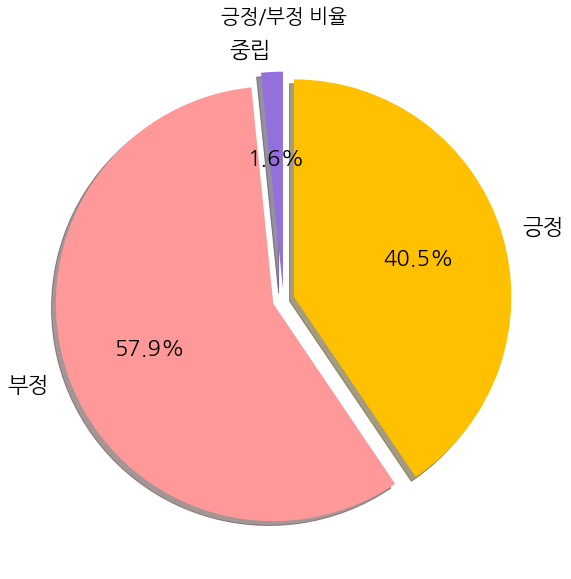

In [22]:
data= [len(df[df['emotion'] == 0]),len(df[df['emotion'] == 1]),len(df[df['emotion'] == -1])]
labels = ['긍정','부정','중립']
colors = ['#ffc000','#ff9999','#9370db']
explode = [0.05 for x in range(len(data))]

plt.figure(figsize=(10,10))
plt.title('긍정/부정 비율', fontsize = 20)
plt.pie(data,
        labels = labels,
        autopct='%.1f%%',
       startangle = 90,
       counterclock=False,
       textprops = {'fontsize':22}, shadow=True, colors = colors, explode = explode)